# Interaction of radiation and matter - Black-body radiation

In this lecture, we are going to discuss

* Energy density versus specific intensity
* Examples of black body radiation
* Radiation pressure
    * Isotropic radiation
    * Directed radiation

## Black body radiation
### Energy density versus specific intensity

Often in text books, blackbody radiation will be discussed in terms of the mean intensity $J_{\nu}$ and the specific intensity $I_{\nu}$, where
$$
    J_{\nu} = \frac{1}{4 \pi} \int I_{\nu} {\rm d} \Omega.
$$
where $\Omega$ is the solid angle through which the intensity is emitted. Thus for isotropic radiation, $J_{\nu}=I_{\nu}$.In the above discussion (and in the derivation in the supplemental content), we focused on $u(\omega,T)$, which is the energy density. It can be shown that this is related to the intensity of light by
$$
    J_{\nu} = \frac{c}{4\pi} u_\nu
$$
And so, for isotropically emitted radiation,
$$
    I_{\nu} = \frac{c}{4\pi}  u_\nu.
$$
It is important to remember this distinction whenever talking about black-body radiation.

Now, let's talk about a few examples of where we see black body radiation in the Universe.

### The Cosmic Microwave Background
- Shortly after the Big Bang, the Universe was opaque to electromagnetic radiation due to Thomson scattering of photons off free electrons.
- Eventually, the Universe sufficiently to allow electrons and protons to recombine into Hydrogren atoms. At this time, the temperature of the background photons was 4,000 K.
- Since then, this radiation has been frozen out of interaction with matter, and has redshifted by a factor of ~1,100 due to the expansion of the Universe.

The spectrum of the CMB is shown below, and matches perfectly with a black body of temperature 2.725 K, peaking near a wavelength of 2 mm. There is an oustanding agreement between the data and model.

![Cavity](Figures/CMB_spectrum.png)

### The Sun
The Sun has a surface temperature of 5,770 K, and a radius of $7\times10^8$m. The total power emitted by the Sun is
$$
    L_{\odot} = \epsilon \sigma A T^4_\odot=4\pi R_\odot^2 \sigma T^4_\odot
$$
$$
    L_{\odot} = 3.9 \times 10^{24} \: {\rm J/s}
$$
So this tells us that, if you have a measurement of the Luminosity of a star, and you can tell where it's spectrum peaks, then you can determine both the temperature and radius of the star, which is very useful for figuring out the current evolutionary status of a star.

### An example of black body spectra generated using AstroPy

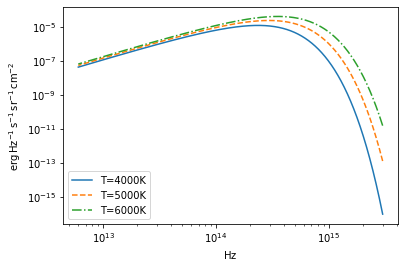

In [8]:
import numpy as np
import matplotlib.pyplot as plt

from astropy.modeling.models import BlackBody
from astropy import units as u
from astropy import constants as c
from astropy.visualization import quantity_support

bb1 = BlackBody(temperature=4000*u.K)
bb2 = BlackBody(temperature=5000*u.K)
bb3 = BlackBody(temperature=6000*u.K)
wav = np.arange(1000, 500000) * u.AA
freq = c.c/wav
flux1 = bb1(wav)
flux2 = bb2(wav)
flux3 = bb3(wav)

with quantity_support():
    plt.figure()
    plt.plot(freq.to(u.Hz), flux1,label='T=4000K')
    plt.plot(freq.to(u.Hz), flux2,'--',label='T=5000K')
    plt.plot(freq.to(u.Hz), flux3,'-.',label='T=6000K')
    plt.xscale("log")
    plt.yscale("log")
    plt.legend()
    plt.show()

## Radiation Pressure

So now we are going to look at a concept which leans on the same analysis and tricks as used when dealing with black body spectra. In our analysis, we found that the energy hitting the wall of a container filled with black body radiation, coming from a volume dV, was
$$
     dE_{\rm abs} = u(T) r^2 \sin \theta dr d\theta d\phi \frac{\Delta A \cos(\theta)}{4 \pi r^2}
$$
$$
     dE_{\rm abs} = u(T) \frac{\Delta A }{4 \pi} \cos \theta \sin \theta dr d\theta d\phi 
$$

### Isotropic Radiation
Now, suppose the photons are reflected from the wall, as in the below figure.

![Cavity](Figures/Photon_Momentum.png)

The change in momentum perpendicular to the wall for photons incident at a angle $\theta$ is
$$
    dp_\perp = \frac{dE}{c} \cos \theta - (-\frac{dE}{c} \cos \theta )
$$
$$
    dp_\perp = \frac{2 dE}{c} \cos \theta
$$
$$
    dp_\perp = \frac{u(T) \Delta A}{2 \pi c} \cos^2 \theta \sin \theta dr d\theta d\phi 
$$
If we want the total change from all photons, then we need to integrate over the hemisphere (as done in the previous lecture)
$$
    \Delta p_\perp = \frac{u(T) \Delta A}{2 \pi c} \int_0^{c \Delta t} dr \int_0^{\pi/2} \cos^2 \theta \sin \theta d\theta \int_0^{2\pi} d \phi
$$
The integral over $\theta$ becomes $-\frac{1}{3}cos^3 \theta$, which when evaluated at the limits gives $\frac{1}{3}$. So the total expression becomes
$$
    \Delta p_\perp = \frac{1}{3} u \Delta A \Delta t
$$
$$
   \frac{\Delta p_\perp / \Delta t}{\Delta A} = \frac{F_\perp}{\Delta A} = P_{\rm rad} = \frac{1}{3} u
$$
This is the pressure exerted due to isotropic radiation.
### Directed Radiation
If the radiation is not isotropic, but is directed, things need a bit of rearranging.

![Cavity](Figures/Photon_Momentum_directed.png)

The energy contained within the volume of photons that will hit $\Delta A$ in $\Delta t$ is:
$$
    E = u \Delta A \; c \; \Delta t = I \Delta A \Delta t
$$
where $I = u c$ is the intensity.
$$
    \Delta p_\perp = \frac{E}{c}-(-\frac{E}{c})=\frac{2E}{c}=\frac{2}{c}u \Delta A \; c \; \Delta t
$$
$$
    \Delta p_\perp = 2u \Delta A \; \Delta t
$$
$$
   \frac{\Delta p_\perp / \Delta t}{\Delta A} = \frac{F_\perp}{\Delta A} = P_{\rm rad} = 2u = 2\frac{I}{c}
$$

If the directed radiation is not reflected, but instead absorbed, then we get that
$$
    \Delta p_\perp = 0-(-\frac{E}{c})=\frac{E}{c} \: , P_{\rm rad} = u = \frac{I}{c}
$$

### Example
A comet releases dust, which is pushed radially away from the Sun by the Sun's radiation pressure. Dust particles have a radius  $R$ and a density of $\rho = 3.5\times 10^3$ kg m$^{-3}$. These dust particles fully absorb sunlight hitting them.
For what $R$ does the graviational force due to the Sun balance the outward force due to radiation pressure?
We're going to first treat the Sun as a point source of radiation. We are also going to say that $F_{\rm rad}$ is outwards and $F_{\rm grav}$ is inwards.
$$
    F_{\rm rad} = P_{\rm rad} A=\frac{I}{c} \pi R^2
$$
$$
    F_{\rm rad} = \frac{1}{c}\frac{L_{\odot}}{4 \pi d^2} \pi R^2
$$
$$
    F_{\rm rad} = \frac{1}{c}\frac{\sigma 4 \pi R_{\odot}^2 T_{\odot}^4}{4 \pi d^2} \pi R^2
$$
$$
    F_{\rm rad} = \frac{1}{c}\frac{\sigma  R_{\odot}^2 T_{\odot}^4}{ d^2} \pi R^2
$$
The graviational force is easier to compute:
$$
    F_{\rm grav} = \frac{GM_{\odot}\rho \frac{4}{3}\pi R^3}{d^2}
$$
So now if we balance these forces, we get
$$
    F_{\rm rad} = F_{\rm grav}
$$
$$
    \frac{1}{c}\frac{\sigma  R_{\odot}^2 T_{\odot}^4}{ d^2} \pi R^2 = \frac{GM_{\odot}\rho \frac{4}{3}\pi R^3}{d^2}
$$
$$
    R = \frac{3}{4} \frac{\sigma R_{\odot}^2 T_{\odot}^4}{c G \rho M_{\odot}}=5800 {\rm A} \left( \frac{1000 {\rm kg m^{-3}}}{\rho} \right)  = 0.166 {\rm \mu m}
$$
Dust particles with this radius feel no net force - which means they feel no acceleration. As such, they travel in a straight line at constant velocity. Particles with a radius bigger than this have $F_{\rm grav}>F_{\rm rad}$, and so curve towards the Sun, while paricle with $R$ less than this value $F_{\rm grav}<F_{\rm rad}$, meaning the path curves away from the Sun.

The collection of all of these paths forms the dust tail of a comet, see the course attachement for a diagram of this effect.